# Effect of Loan Characteristics on Borrower's APR
## Scholastica Olanrewaju

## Investigation Overview

In this investigation, I looked at the characteristics of loan and its borrower that could be used to predict borrower's APR. The main focus was on: prosper score, loan amount and credit score.

## Dataset Overview
The __[Loan Dataset](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1547358770029000contained)__ contained data for 113,947 
loans with __[81 variables](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)__ on each loan. The variables included different datatypes- numeric, categorical and datetime. 
After preliminary wrangling which took out inconsistencies, missing information and columns irrelevant to the analysis, **83,397** loans with 28 variables remained in the dataset. The variables include borrower APR (or interest rate), term, occupation, current loan status, loan amount, prosper score, employment status etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

The clean dataset saved to-csv after wrangling is imported in the cell below

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('loan_clean.csv')
df.shape

(83397, 28)

## Distribution of Borrower APR
Borrower APR in teh dataset ranged from 0.045 to 0.423. Plotted in an histogram, the distribution of borrower's APR takes on a multimodal shape - with peaks at 0.10, 0.18, 0.30 and 0.36. The highest peak is observed at 0.36.

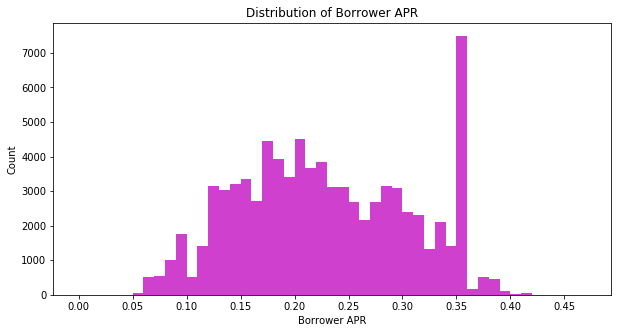

In [3]:
#Plot histogram to see distribution of borrower APR
bins = np.arange(0, df.BorrowerAPR.max()+0.05, 0.01)

plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'BorrowerAPR', bins = bins, facecolor='m', alpha=0.75);
plt.title('Distribution of Borrower APR')
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.xticks(np.arange(0, df['BorrowerAPR'].max()+0.05, 0.05));

## Pair-Wise Relationship

**Prosper score, credit score and loan amount** are negatively correlated with borrower APR. <br> The relationship between monthly income and borrower APR is too weak to be of importance. Therefore, monthly income was not be analysed further.

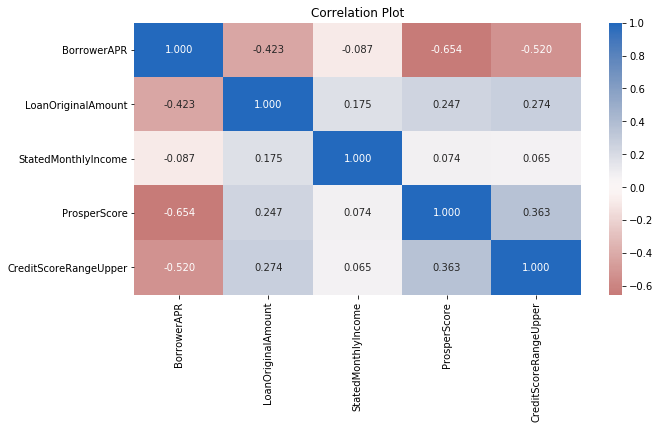

In [4]:
#group varables
numeric_vars = ['BorrowerAPR', 'LoanOriginalAmount', 'StatedMonthlyIncome','ProsperScore', 'CreditScoreRangeUpper']
categoric_vars = ['Term', 'IsBorrowerHomeowner', 'ListingCategory']

#Correlation plot
plt.figure(figsize = [10, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot');

## How does home ownership affect borrower APR?
Home owners have lower borrower APR when compared with non-home owners.

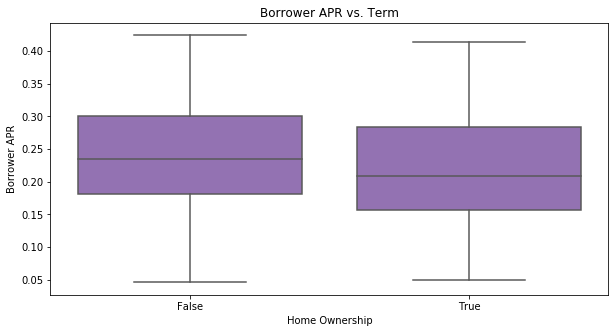

In [5]:
#Define samples
samples = np.random.choice(df.shape[0], 3000, replace = False)
loan_samp = df.loc[samples,:]

#Plot boxplot
plt.figure(figsize=[10,5])
default_color = sb.color_palette()[4]
sb.boxplot(data=df, x='IsBorrowerHomeowner', y='BorrowerAPR', color=default_color)
plt.xlabel('Home Ownership')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Term');

## How does home ownership affect borrower APR and loan amount?
When compared with loan amount and borrowed APR, home ownership did not appear to have an effect on borrrower rating 

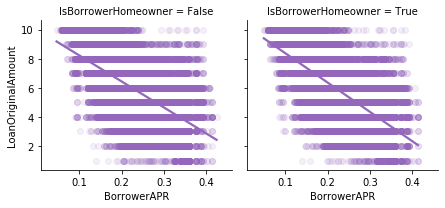

In [6]:
#facetgrid
g = sb.FacetGrid(data = df, col = 'IsBorrowerHomeowner', col_wrap = 4, height = 3)
g.map(sb.regplot, 'BorrowerAPR', 'ProsperScore', scatter_kws={'alpha': 0.1}, color=sb.color_palette()[4])
g.set_xlabels('BorrowerAPR')
g.set_ylabels('LoanOriginalAmount')

plt.show();

## Borrower APR vs Credit score vs Loan amount
This further confirms the hypothesis that credit score and loan  are negatively correlated to BorrowerAPR.

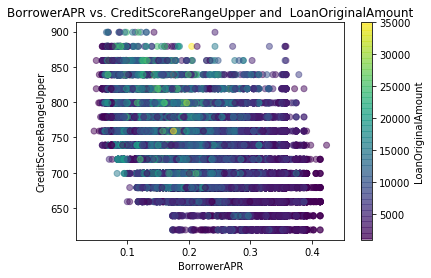

In [7]:
#facetgrid
plt.scatter(data = df, x = 'BorrowerAPR', y = 'CreditScoreRangeUpper', c ='LoanOriginalAmount', alpha = 0.5)
plt.colorbar(label = 'LoanOriginalAmount')
plt.title('BorrowerAPR vs. CreditScoreRangeUpper and  LoanOriginalAmount')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');

In [ ]:
!jupyter nbconvert CommunicateDataFindings_Presentation.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook project_Loan_Part2.ipynb to slides
[NbConvertApp] Writing 486210 bytes to project_Loan_Part2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/project_Loan_Part2.slides.html
Use Control-C to stop this server
